# UMAP embeddings of peptidomic data into two-dimension
### Input file
* `dn_control_test_train.csv` peptidomic data of 800 DN (diabetic nephropathy) patients and healthy controls
### Steps
1. Use UMAP to reduce the dimensionality of peptidomic data to from $4000$ to $2$
2. Plot the embedded data in scatter plot
### Results
The DN vs controls patients form two clusters, but with large overlap
### Conclusion
We need a better algorithm for embedding to achieve better separation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

import umap
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from set_path import *
from helper import plot_points, plot_bar

In [4]:
df1=pd.read_csv(f2+'dn_control_test_train.csv',index_col=0)

In [5]:
df1.head()

,Krankheit,x99900001,x99900002,x99900005,x99900015,x99900017,x99900028,x99900034,x99900081,x99900082,...,x99920718,x99920740,x99920743,x99920748,x99920805,x99920946,x99921328,x99921391,x99921470,x99921471
92250000,DN_Neph,0.0,0.0,0.000,0.0000,0.0000,0.0,0.00,0.0,0.0,...,0.0,314950.00,0.00,251234.00,0.0,2925.84,0.0,0.0,0.0,0.0
182080000,DN_Neph,0.0,0.0,547.641,36.7343,70.1232,0.0,14.79,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
182340000,DN_Neph,0.0,0.0,0.000,0.0000,0.0000,0.0,0.00,0.0,0.0,...,0.0,0.00,946.15,101873.00,0.0,2525.91,0.0,0.0,0.0,0.0
203480000,DN_Neph,0.0,0.0,0.000,0.0000,0.0000,0.0,0.00,0.0,0.0,...,0.0,48911.20,0.00,2039.61,0.0,0.00,0.0,0.0,0.0,0.0
203580000,DN_Neph,0.0,0.0,0.000,0.0000,0.0000,0.0,0.00,0.0,0.0,...,0.0,4670.84,0.00,0.00,0.0,0.00,0.0,0.0,38401.3,10179.5


In [5]:
# log transform X, then add a threshold
X=np.log(df1.iloc[:,1:]+1)
X.fillna(0,inplace=True)


In [7]:
X.shape

(806, 270)

In [6]:
# convert y from digit to string
y=df1.iloc[:,0]
le=preprocessing.LabelEncoder()
y_num=le.fit_transform(y)

In [7]:
mapper=umap.UMAP().fit(X)

In [8]:
embeddings=mapper.embedding_
embeddings

array([[-0.14507572,  6.081396  ],
       [-2.638934  ,  7.297375  ],
       [-0.201061  ,  6.9480677 ],
       ...,
       [-4.106171  , 10.196672  ],
       [-1.7869669 , 10.0122175 ],
       [-3.8966718 , 10.173118  ]], dtype=float32)

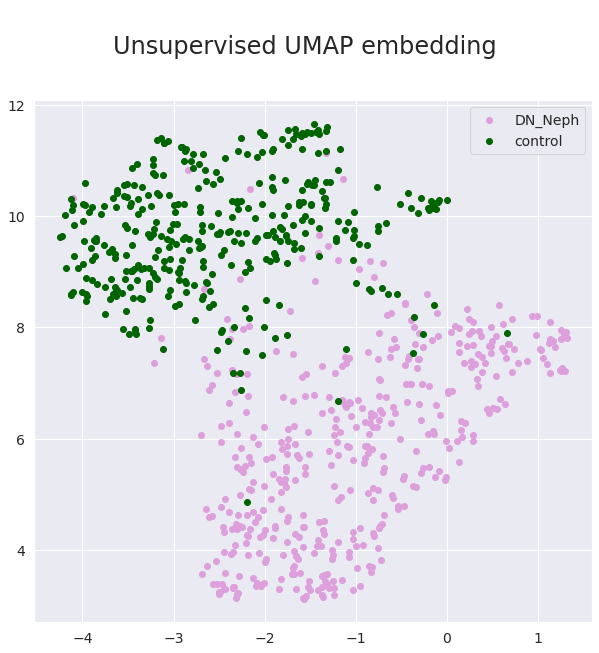

In [12]:
plot_points(embeddings,y,title='Unsupervised UMAP embedding',output1='unsupervised_1.tiff')

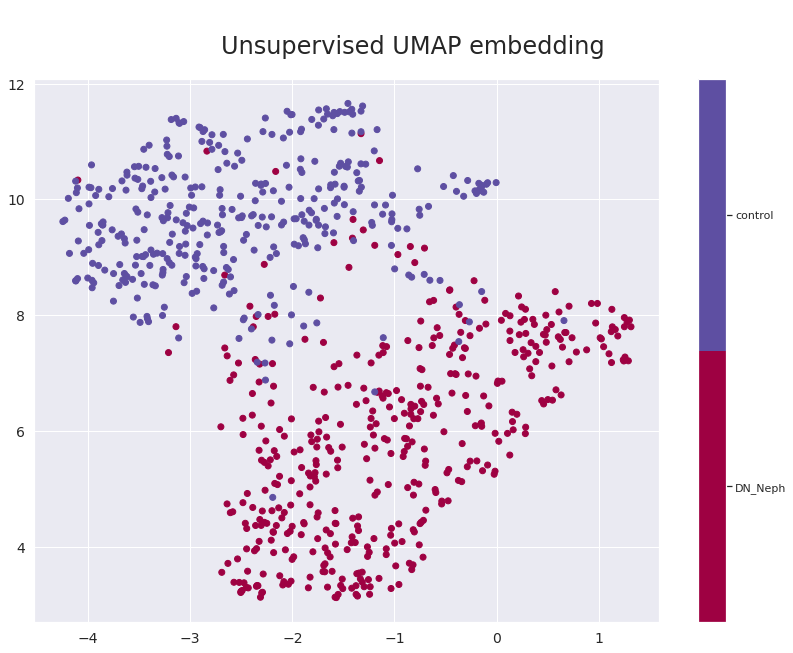

In [11]:
plot_bar(embeddings,y,title='Unsupervised UMAP embedding',output1='unsupervised_bar.tiff')